# Estimating Economic Growth using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data.csv')
data

,year,country,gdp,gdp_deflator,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,...,manufacturing,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry
0,1996,Afghanistan,NaN,NaN,NaN,NaN,NaN,4695426.0,145.6,NaN,...,NaN,NaN,NaN,18853437.0,NaN,48.870,12.964,NaN,NaN,NaN
1,1997,Afghanistan,NaN,NaN,NaN,NaN,NaN,4788255.0,141.2,NaN,...,NaN,NaN,NaN,19357126.0,NaN,48.833,12.655,-867540.0,NaN,NaN
2,1998,Afghanistan,NaN,NaN,NaN,NaN,NaN,4853675.0,136.9,NaN,...,NaN,NaN,NaN,19737765.0,NaN,48.688,12.348,NaN,NaN,NaN
3,1999,Afghanistan,NaN,NaN,NaN,NaN,NaN,4939405.0,132.8,NaN,...,NaN,NaN,NaN,20170844.0,NaN,48.419,12.037,NaN,NaN,NaN
4,2000,Afghanistan,NaN,NaN,NaN,NaN,NaN,5071018.0,128.7,NaN,...,NaN,NaN,NaN,20779953.0,NaN,48.021,11.718,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5275,2011,Zimbabwe,1.410192e+10,96.127432,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,...,1.293485e+09,NaN,20.0,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09
5276,2012,Zimbabwe,1.711485e+10,100.000000,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,...,2.403507e+09,15.2,19.8,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09
5277,2013,Zimbabwe,1.909102e+10,109.370603,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,...,2.466380e+09,NaN,19.6,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09
5278,2014,Zimbabwe,1.949552e+10,109.094835,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,...,2.454635e+09,14.7,17.7,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09


## Analysing missing data

In [3]:
data.isnull().sum()

year                               0
country                            0
gdp                              316
gdp_deflator                    1261
foreign_direct_investment       1924
gross_savings                   2335
unemployment                    2372
labor_force                      620
mortality_rate                   500
new_businesses_registered       4056
education_expenditure           1635
age_dependency_ratio             484
food_production_index            398
human_capital_index             5177
imports                          768
exports                          772
life_expectancy_birth            361
manufacturing                    954
tobacco_use                     4516
profit_tax                      2851
population                        26
literacy_rate                   3895
birth_rate                       268
death_rate                       279
migration                       4320
agriculture_forestry_fishing     681
industry                         717
d

## Calculating GDP per capita

In [4]:
data['gdp_per_capita'] = data.gdp / data.population
data.tail()

,year,country,gdp,gdp_deflator,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
5275,2011,Zimbabwe,1.410192e+10,96.127432,-344300000.0,-3.479166e+08,5.37,6194591.0,81.4,8541.0,...,NaN,20.0,12894316.0,83.58271,36.526,12.384,NaN,1.222053e+09,3.062978e+09,1093.654002
5276,2012,Zimbabwe,1.711485e+10,100.000000,-349850000.0,-2.406172e+09,NaN,6285545.0,73.8,9491.0,...,15.2,19.8,13115131.0,NaN,36.292,11.167,-622997.0,1.376807e+09,4.335296e+09,1304.969802
5277,2013,Zimbabwe,1.909102e+10,109.370603,-373050000.0,-9.432642e+08,NaN,6385796.0,67.8,9782.0,...,NaN,19.6,13350356.0,NaN,35.768,10.115,NaN,1.363954e+09,4.543589e+09,1430.000818
5278,2014,Zimbabwe,1.949552e+10,109.094835,-472800000.0,-5.911380e+08,4.77,6486791.0,64.4,9465.0,...,14.7,17.7,13586681.0,88.69342,34.978,9.277,NaN,1.704942e+09,4.624054e+09,1434.899340
5279,2015,Zimbabwe,1.996312e+10,109.757928,-399200000.0,-1.637758e+09,NaN,6587823.0,62.0,9055.0,...,NaN,17.6,13814629.0,NaN,33.981,8.673,NaN,1.653794e+09,4.463433e+09,1445.071062


## Dropping the data with missing GDP per capita

In [5]:
data.dropna(subset=['gdp_per_capita'], inplace=True)
data.shape

(4964, 28)

In [6]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)

## Imputing the NaN values using k-Nearest Neighbors

In [7]:
imp = KNNImputer(n_neighbors=20)
data.iloc[:, 2:] = imp.fit_transform(data.iloc[:, 2:])
data.head()

,year,country,gdp,gdp_deflator,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,2002,Afghanistan,4.055180e+09,40.319443,-1.413012e+08,5.286567e+08,9.373500,5573458.0,120.4,3524.25,...,20.465000,19.255000,22600770.0,71.356713,46.901,11.048,744193.00,1.566430e+09,9.655434e+08,179.426611
1,2003,Afghanistan,4.515559e+09,45.018770,-2.309113e+08,4.918790e+08,9.919000,5886907.0,116.3,3023.20,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,1.689670e+09,1.025522e+09,190.683814
2,2004,Afghanistan,5.226779e+09,50.093030,-2.307150e+08,7.126885e+08,8.830000,6198355.0,112.1,4244.00,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.553454e+09,1.370816e+09,211.382117
3,2005,Afghanistan,6.209138e+09,55.559569,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,242.031285
4,2006,Afghanistan,6.971286e+09,59.559720,-1.792178e+08,8.660660e+08,6.204500,6644359.0,103.7,2833.15,...,22.674953,0.000000,26433049.0,57.309657,43.870,9.645,-102640.95,1.996295e+09,1.966653e+09,263.733692


## Changing base year of GDP deflator of every country to 2005

In [8]:
countries = data.country.unique()
len(countries)

258

In [9]:
for country in countries:
    base = data['gdp_deflator'][(data.country == country) & (data.year == 2005)]
    if(len(base) == 0):
        base = data['gdp_deflator'][data.country == country].mean()
    else:
        base = base.iloc[0]
    data.loc[data.country == country, 'gdp_deflator'] /= base / 100
data.head()

,year,country,gdp,gdp_deflator,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,2002,Afghanistan,4.055180e+09,72.569755,-1.413012e+08,5.286567e+08,9.373500,5573458.0,120.4,3524.25,...,20.465000,19.255000,22600770.0,71.356713,46.901,11.048,744193.00,1.566430e+09,9.655434e+08,179.426611
1,2003,Afghanistan,4.515559e+09,81.027932,-2.309113e+08,4.918790e+08,9.919000,5886907.0,116.3,3023.20,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,1.689670e+09,1.025522e+09,190.683814
2,2004,Afghanistan,5.226779e+09,90.160941,-2.307150e+08,7.126885e+08,8.830000,6198355.0,112.1,4244.00,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.553454e+09,1.370816e+09,211.382117
3,2005,Afghanistan,6.209138e+09,100.000000,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,242.031285
4,2006,Afghanistan,6.971286e+09,107.199751,-1.792178e+08,8.660660e+08,6.204500,6644359.0,103.7,2833.15,...,22.674953,0.000000,26433049.0,57.309657,43.870,9.645,-102640.95,1.996295e+09,1.966653e+09,263.733692


## Converting nominal variables to real variables

In [10]:
data.columns

Index(['year', 'country', 'gdp', 'gdp_deflator', 'foreign_direct_investment',
       'gross_savings', 'unemployment', 'labor_force', 'mortality_rate',
       'new_businesses_registered', 'education_expenditure',
       'age_dependency_ratio', 'food_production_index', 'human_capital_index',
       'imports', 'exports', 'life_expectancy_birth', 'manufacturing',
       'tobacco_use', 'profit_tax', 'population', 'literacy_rate',
       'birth_rate', 'death_rate', 'migration', 'agriculture_forestry_fishing',
       'industry', 'gdp_per_capita'],
      dtype='object')

In [11]:
nominal_var = ['gdp', 'foreign_direct_investment', 'gross_savings', 'education_expenditure', 'imports', 'exports', 'manufacturing', 'agriculture_forestry_fishing', 'industry', 'gdp_per_capita']
for var in nominal_var:
    data[var] /= data.gdp_deflator / 100
data.drop('gdp_deflator', axis=1, inplace=True)
data.head()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,tobacco_use,profit_tax,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita
0,2002,Afghanistan,5.587975e+09,-1.947109e+08,7.284808e+08,9.373500,5573458.0,120.4,3524.25,1.607442e+08,...,20.465000,19.255000,22600770.0,71.356713,46.901,11.048,744193.00,2.158517e+09,1.330504e+09,247.247096
1,2003,Afghanistan,5.572842e+09,-2.849774e+08,6.070487e+08,9.919000,5886907.0,116.3,3023.20,2.289413e+08,...,19.760000,18.000000,23680871.0,67.580448,46.231,10.704,-20393.25,2.085294e+09,1.265641e+09,235.330964
2,2004,Afghanistan,5.797165e+09,-2.558925e+08,7.904626e+08,8.830000,6198355.0,112.1,4244.00,2.089063e+08,...,19.091144,18.963333,24726684.0,65.520050,45.507,10.356,-105319.20,1.722979e+09,1.520410e+09,234.449769
3,2005,Afghanistan,6.209138e+09,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,1.976982e+08,...,21.744152,0.000000,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,242.031285
4,2006,Afghanistan,6.503080e+09,-1.671812e+08,8.078992e+08,6.204500,6644359.0,103.7,2833.15,1.732177e+08,...,22.674953,0.000000,26433049.0,57.309657,43.870,9.645,-102640.95,1.862220e+09,1.834569e+09,246.020806


## Calculating change in GDP per capita

In [12]:
data_change = data.copy()
data_change['gdp_per_capita2'] = 0
data_change['gdp_per_capita2'][:-1] = data_change['gdp_per_capita'][1:]
data_change['gdp_per_capita_change'] = data_change.gdp_per_capita2 - data_change.gdp_per_capita
data_change.tail()

<ipython-input-12-4ec43fda0595>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_change['gdp_per_capita2'][:-1] = data_change['gdp_per_capita'][1:]


,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
4959,2011,Zimbabwe,6.746895e+09,-1.647262e+08,-1.664565e+08,5.3700,6194591.0,81.4,8541.0,1.105866e+08,...,12894316.0,83.582710,36.526,12.384,-128308.20,5.846768e+08,1.465445e+09,523.245677,600.168927,76.923250
4960,2012,Zimbabwe,7.871294e+09,-1.608996e+08,-1.106623e+09,14.4965,6285545.0,73.8,9491.0,1.308970e+08,...,13115131.0,76.182669,36.292,11.167,-622997.00,6.332076e+08,1.993847e+09,600.168927,601.324259,1.155332
4961,2013,Zimbabwe,8.027893e+09,-1.568699e+08,-3.966485e+08,13.0445,6385796.0,67.8,9782.0,1.382525e+08,...,13350356.0,78.333111,35.768,10.115,-123286.35,5.735512e+08,1.910608e+09,601.324259,604.909342,3.585083
4962,2014,Zimbabwe,8.218710e+09,-1.993179e+08,-2.492056e+08,4.7700,6486791.0,64.4,9465.0,1.420632e+08,...,13586681.0,88.693420,34.978,9.277,-123286.35,7.187512e+08,1.949359e+09,604.909342,605.517010,0.607668
4963,2015,Zimbabwe,8.364993e+09,-1.672737e+08,-6.862573e+08,12.4935,6587823.0,62.0,9055.0,1.439060e+08,...,13814629.0,77.697648,33.981,8.673,-123286.35,6.929767e+08,1.870278e+09,605.517010,0.000000,-605.517010


In [13]:
data_change.iloc[:-1, 1:-3] = data_change.iloc[1:, 1:-3]
data_change.tail()

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
4959,2011,Zimbabwe,7.871294e+09,-1.608996e+08,-1.106623e+09,14.4965,6285545.0,73.8,9491.0,1.308970e+08,...,13115131.0,76.182669,36.292,11.167,-622997.00,6.332076e+08,1.993847e+09,523.245677,600.168927,76.923250
4960,2012,Zimbabwe,8.027893e+09,-1.568699e+08,-3.966485e+08,13.0445,6385796.0,67.8,9782.0,1.382525e+08,...,13350356.0,78.333111,35.768,10.115,-123286.35,5.735512e+08,1.910608e+09,600.168927,601.324259,1.155332
4961,2013,Zimbabwe,8.218710e+09,-1.993179e+08,-2.492056e+08,4.7700,6486791.0,64.4,9465.0,1.420632e+08,...,13586681.0,88.693420,34.978,9.277,-123286.35,7.187512e+08,1.949359e+09,601.324259,604.909342,3.585083
4962,2014,Zimbabwe,8.364993e+09,-1.672737e+08,-6.862573e+08,12.4935,6587823.0,62.0,9055.0,1.439060e+08,...,13814629.0,77.697648,33.981,8.673,-123286.35,6.929767e+08,1.870278e+09,604.909342,605.517010,0.607668
4963,2015,Zimbabwe,8.364993e+09,-1.672737e+08,-6.862573e+08,12.4935,6587823.0,62.0,9055.0,1.439060e+08,...,13814629.0,77.697648,33.981,8.673,-123286.35,6.929767e+08,1.870278e+09,605.517010,0.000000,-605.517010


In [14]:
data_change.set_index('year', inplace=True)
data_change.drop(2015, inplace=True)
data_change.reset_index(inplace=True)
data_change.year = data_change.year + 1
data_change

,year,country,gdp,foreign_direct_investment,gross_savings,unemployment,labor_force,mortality_rate,new_businesses_registered,education_expenditure,...,population,literacy_rate,birth_rate,death_rate,migration,agriculture_forestry_fishing,industry,gdp_per_capita,gdp_per_capita2,gdp_per_capita_change
0,2003,Afghanistan,5.572842e+09,-2.849774e+08,6.070487e+08,9.919000,5886907.0,116.3,3023.20,2.289413e+08,...,23680871.0,67.580448,46.231,10.704,-20393.25,2.085294e+09,1.265641e+09,247.247096,235.330964,-11.916132
1,2004,Afghanistan,5.797165e+09,-2.558925e+08,7.904626e+08,8.830000,6198355.0,112.1,4244.00,2.089063e+08,...,24726684.0,65.520050,45.507,10.356,-105319.20,1.722979e+09,1.520410e+09,235.330964,234.449769,-0.881195
2,2005,Afghanistan,6.209138e+09,-2.356262e+08,9.238376e+08,5.750358,6483460.0,107.9,2675.60,1.976982e+08,...,25654277.0,60.358543,44.723,10.003,-183431.65,1.931964e+09,1.664800e+09,234.449769,242.031285,7.581516
3,2006,Afghanistan,6.503080e+09,-1.671812e+08,8.078992e+08,6.204500,6644359.0,103.7,2833.15,1.732177e+08,...,26433049.0,57.309657,43.870,9.645,-102640.95,1.862220e+09,1.834569e+09,242.031285,246.020806,3.989521
4,2007,Afghanistan,7.421333e+09,-3.088863e+08,1.275667e+09,6.518000,6770366.0,99.5,2357.15,2.666646e+08,...,27100536.0,68.419065,42.944,9.287,-1046361.00,2.234193e+09,1.995021e+09,246.020806,273.844495,27.823689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,2011,Zimbabwe,6.746895e+09,-1.647262e+08,-1.664565e+08,5.370000,6194591.0,81.4,8541.00,1.105866e+08,...,12894316.0,83.582710,36.526,12.384,-128308.20,5.846768e+08,1.465445e+09,465.302252,523.245677,57.943425
4708,2012,Zimbabwe,7.871294e+09,-1.608996e+08,-1.106623e+09,14.496500,6285545.0,73.8,9491.00,1.308970e+08,...,13115131.0,76.182669,36.292,11.167,-622997.00,6.332076e+08,1.993847e+09,523.245677,600.168927,76.923250
4709,2013,Zimbabwe,8.027893e+09,-1.568699e+08,-3.966485e+08,13.044500,6385796.0,67.8,9782.00,1.382525e+08,...,13350356.0,78.333111,35.768,10.115,-123286.35,5.735512e+08,1.910608e+09,600.168927,601.324259,1.155332
4710,2014,Zimbabwe,8.218710e+09,-1.993179e+08,-2.492056e+08,4.770000,6486791.0,64.4,9465.00,1.420632e+08,...,13586681.0,88.693420,34.978,9.277,-123286.35,7.187512e+08,1.949359e+09,601.324259,604.909342,3.585083


In [15]:
data.drop(['year', 'country', 'gdp'], axis=1, inplace=True)
data_change.drop(['year', 'country', 'gdp', 'gdp_per_capita', 'gdp_per_capita2'], axis=1, inplace=True)

## Data Visualization

### Plot of the target variable

Mean: 12126.134572076002
Standard Deviation: 26568.308328310643
Mean Absolute Deviation: 13347.679900928873


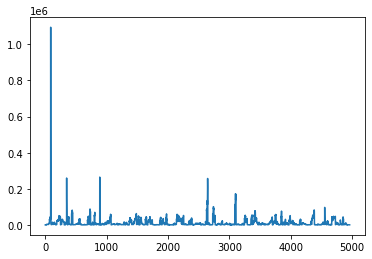

In [16]:
data.gdp_per_capita.plot()
print('Mean:', data.gdp_per_capita.mean())
print('Standard Deviation:', data.gdp_per_capita.std())
print('Mean Absolute Deviation:', data.gdp_per_capita.mad())

Mean: -263.27408286000616
Standard Deviation: 10514.52190219185
Mean Absolute Deviation: 1376.3827631760414


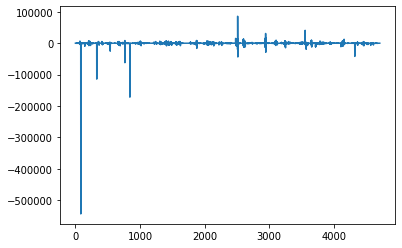

In [17]:
data_change.gdp_per_capita_change.plot()
print('Mean:', data_change.gdp_per_capita_change.mean())
print('Standard Deviation:', data_change.gdp_per_capita_change.std())
print('Mean Absolute Deviation:', data_change.gdp_per_capita_change.mad())

### Correlation heatmap between the variables

In [ ]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), mask=matrix, square=True, linewidths=0.5)

In [ ]:
plt.figure(figsize=(15, 15))
matrix = np.triu(data_change.corr())
sns.heatmap(data_change.corr(), mask=matrix, square=True, linewidths=0.5)

### Scatter plot between different input variables and target variable

In [ ]:
columns = data.columns
for i in range(data.shape[1]-1):
  data.plot.scatter(x=columns[i], y=columns[-1])

In [ ]:
columns_change = data_change.columns
for i in range(data_change.shape[1]-1):
    data_change.plot.scatter(x=columns_change[i], y=columns_change[-1])

In [22]:
data.to_csv('data_final.csv', index=False)
data_change.to_csv('data_change_final.csv', index=False)